In [36]:
import pandas as pd
import geopandas as gp
%matplotlib inline  


In [92]:
qcew17 = pd.read_csv('C:/Workspace/TNC-Demand-Model/Inputs/QCEW/2017.q1-q4.by_area/2017.q1-q4 17031 Cook County, Illinois.csv')

In [93]:
q417 = qcew17['month3_emplvl'][0]

In [94]:
q417

2543074

In [95]:
qcew19 = pd.read_csv('C:/Workspace/TNC-Demand-Model/Inputs/QCEW/2019.q1-q4.by_area/2019.q1-q4 17031 Cook County, Illinois.csv')

In [96]:
q419 = qcew19['month1_emplvl'][0]

In [97]:
q419

2557301

In [98]:
scalar = q419/q417

In [99]:
scalar

1.0055944105440895

In [290]:
wac = pd.read_csv('C:/Workspace/TNC-Demand-Model/Inputs/LEHD/il_wac_S000_JT00_2017.csv')
rac = pd.read_csv('C:/Workspace/TNC-Demand-Model/Inputs/LEHD/il_rac_S000_JT00_2017.csv')
od = pd.read_csv('C:/Workspace/TNC-Demand-Model/Inputs/LEHD/il_od_main_JT00_2017.csv')

In [291]:
wac.head()

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
0,170010001001001,35,10,16,9,3,16,16,0,0,...,0,0,0,0,0,0,0,0,0,20190825
1,170010001001003,5,1,3,1,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,20190825
2,170010001001004,48,5,36,7,2,4,42,0,0,...,0,0,0,0,0,0,0,0,0,20190825
3,170010001001007,47,5,32,10,8,13,26,0,0,...,0,0,0,0,0,0,0,0,0,20190825
4,170010001001010,19,6,9,4,8,10,1,0,0,...,0,0,0,0,0,0,0,0,0,20190825


In [292]:
rac.head()

,h_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CR07,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,createdate
0,170010001001001,75,17,47,11,17,33,25,0,0,...,1,72,3,9,19,22,8,48,27,20190825
1,170010001001003,1,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,20190825
2,170010001001009,14,3,10,1,5,4,5,0,0,...,0,14,0,0,4,3,4,8,6,20190825
3,170010001001010,92,19,56,17,21,34,37,0,0,...,0,92,0,10,27,26,10,43,49,20190825
4,170010001001011,19,0,12,7,4,7,8,0,0,...,0,16,3,3,4,3,9,6,13,20190825


In [294]:
od.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,170010001001001,170010001002019,1,0,0,1,0,0,1,0,1,0,20190825
1,170010001001001,170010001003006,1,0,0,1,0,1,0,1,0,0,20190825
2,170010001001001,170010001004018,1,1,0,0,1,0,0,1,0,0,20190825
3,170010001001001,170010002012002,1,1,0,0,0,1,0,0,1,0,20190825
4,170010001001001,170010002021000,1,0,1,0,0,1,0,1,0,0,20190825


In [295]:
blocks = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Blocks/tl_2017_17_tabblock10/tl_2017_17_tabblock10.shp')

In [296]:
blocks.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,17,021,958700,4176,170219587004176,Block 4176,G5040,R,None,None,S,0,219026,+39.3725281,-089.0927334,"POLYGON ((-89.09853 39.37142, -89.09795 39.371..."
1,17,201,004003,1044,172010040031044,Block 1044,G5040,R,None,None,S,0,45258,+42.4688210,-089.0777438,"POLYGON ((-89.07835 42.46753, -89.07829 42.467..."
2,17,201,000200,3002,172010002003002,Block 3002,G5040,U,75718,U,S,216076,17947,+42.3228892,-089.0350716,"POLYGON ((-89.03724 42.31859, -89.03725 42.325..."
3,17,179,020100,3039,171790201003039,Block 3039,G5040,U,68509,U,S,0,28113,+40.6847558,-089.5910001,"POLYGON ((-89.59207 40.68506, -89.59120 40.685..."
4,17,001,010500,2099,170010105002099,Block 2099,G5040,R,None,None,S,0,103125,+39.9347482,-091.4208457,"POLYGON ((-91.42411 39.93575, -91.41875 39.935..."


In [298]:
wac['w_geocode'] = wac['w_geocode'].astype(str)
rac['h_geocode'] = rac['h_geocode'].astype(str)
od['h_geocode'] = od['h_geocode'].astype(str)
od['w_geocode'] = od['w_geocode'].astype(str)

In [299]:
wac_geo = blocks[['geometry','COUNTYFP10','GEOID10','TRACTCE10']].merge(wac, how = 'right', left_on = 'GEOID10', right_on = 'w_geocode')
rac_geo = blocks[['geometry','COUNTYFP10','GEOID10','TRACTCE10']].merge(rac, how = 'right', left_on = 'GEOID10', right_on = 'h_geocode')
od_geo = blocks[['geometry','COUNTYFP10','GEOID10','TRACTCE10']].merge(od, how = 'right', left_on = 'GEOID10', right_on = 'h_geocode')
od_geo = blocks[['geometry','COUNTYFP10','GEOID10','TRACTCE10']].merge(od_geo, how = 'right', left_on = 'GEOID10', right_on = 'w_geocode', suffixes =('','_DESTINATION'))


In [300]:
od_geo.GEOID10.unique()

array(['172010002003002', '171990209003029', '171990214003162', ...,
       '170438411024005', '170318300071025', '171670013002043'],
      dtype=object)

In [313]:
od_geo = od_geo[od_geo['COUNTYFP10'] == '031']

In [347]:
agg = {'geometry':'first', 'S000':'sum', 'SA01':'sum', 'SA02':'sum', 'SA03':'sum', 'SE01':'sum', 'SE02':'sum', 'SE03':'sum', 'SI01':'sum', 'SI02':'sum', 'SI03':'sum'}


In [348]:
od_geo_grouped = od_geo.groupby(by = ['TRACTCE10', 'TRACTCE10_DESTINATION'], as_index = False).agg(agg)

In [349]:
od_geo_grouped.head()

,TRACTCE10,TRACTCE10_DESTINATION,geometry,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03
0,010100,001300,"POLYGON ((-87.67677 42.02255, -87.67582 42.022...",1,0,0,1,0,1,0,0,0,1
1,010100,010100,"POLYGON ((-87.67677 42.02255, -87.67582 42.022...",25,2,14,9,8,14,3,0,0,25
2,010100,010201,"POLYGON ((-87.67677 42.02255, -87.67582 42.022...",15,2,9,4,4,8,3,0,1,14
3,010100,010202,"POLYGON ((-87.67677 42.02255, -87.67582 42.022...",6,2,3,1,0,6,0,0,0,6
4,010100,010300,"POLYGON ((-87.67677 42.02255, -87.67582 42.022...",7,0,2,5,0,6,1,0,0,7


In [200]:
tracts = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Tracts/tl_2019_17_tract/tl_2019_17_tract.shp')

In [261]:
wac_geo_tracts = tracts[['TRACTCE','COUNTYFP','geometry']].merge(wac_geo[['TRACTCE10','C000','CA01' ,'CA02' , 'CA03', 'CE01' , 'CE02', 'CE03', 'CNS18']], how = 'right', right_on = 'TRACTCE10', left_on = 'TRACTCE')
rac_geo_tracts = tracts[['TRACTCE','COUNTYFP','geometry']].merge(rac_geo[['TRACTCE10','C000','CA01' ,'CA02' , 'CA03', 'CE01' , 'CE02', 'CE03', 'CNS18']], how = 'right', right_on = 'TRACTCE10', left_on = 'TRACTCE')

In [262]:
rac_geo_tracts.head()

,TRACTCE,COUNTYFP,geometry,TRACTCE10,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS18
0,011700,091,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",011700,5,4,1,0,4,0,1,0
1,011700,077,"POLYGON ((-89.24891 37.68802, -89.24852 37.688...",011700,5,4,1,0,4,0,1,0
2,011700,091,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",011700,9,1,8,0,2,3,4,0
3,011700,077,"POLYGON ((-89.24891 37.68802, -89.24852 37.688...",011700,9,1,8,0,2,3,4,0
4,011700,091,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",011700,3,1,2,0,2,1,0,1


In [309]:
scaled_cols = ['C000','CA01' ,'CA02' , 'CA03', 'CE01' , 'CE02', 'CE03', 'CNS18']
od_scaled_cols = ['S000', 'SA01', 'SA02', 'SA03', 'SE01', 'SE02', 'SE03', 'SI01', 'SI02', 'SI03']

In [264]:
for col in scaled_cols:
    wac_geo_tracts[col] = wac_geo_tracts[col] * scalar
    rac_geo_tracts[col] = rac_geo_tracts[col] * scalar
    

In [350]:
for col in od_scaled_cols:
    od_geo_grouped[col] = od_geo_grouped[col] * scalar


In [265]:
rac_geo_tracts.head()

,TRACTCE,COUNTYFP,geometry,TRACTCE10,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS18
0,011700,091,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",011700,5.027972,4.022378,1.005594,0.0,4.022378,0.000000,1.005594,0.000000
1,011700,077,"POLYGON ((-89.24891 37.68802, -89.24852 37.688...",011700,5.027972,4.022378,1.005594,0.0,4.022378,0.000000,1.005594,0.000000
2,011700,091,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",011700,9.050350,1.005594,8.044755,0.0,2.011189,3.016783,4.022378,0.000000
3,011700,077,"POLYGON ((-89.24891 37.68802, -89.24852 37.688...",011700,9.050350,1.005594,8.044755,0.0,2.011189,3.016783,4.022378,0.000000
4,011700,091,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",011700,3.016783,1.005594,2.011189,0.0,2.011189,1.005594,0.000000,1.005594


In [267]:
cook_wac_tracts = wac_geo_tracts[wac_geo_tracts['COUNTYFP'] == '031']
cook_rac_tracts = rac_geo_tracts[rac_geo_tracts['COUNTYFP'] == '031']

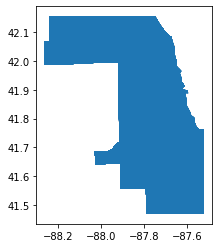

In [269]:
cook_rac_tracts.plot()

In [270]:
cook_rac_tracts.head()

,TRACTCE,COUNTYFP,geometry,TRACTCE10,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS18
153281,030800,031,"POLYGON ((-87.66876 41.98349, -87.66853 41.983...",030800,2.011189,2.011189,0.000000,0.000000,1.005594,1.005594,0.000000,1.005594
153283,030800,031,"POLYGON ((-87.66876 41.98349, -87.66853 41.983...",030800,39.218182,7.039161,23.128671,9.050350,13.072727,20.111888,6.033566,3.016783
153285,030800,031,"POLYGON ((-87.66876 41.98349, -87.66853 41.983...",030800,4.022378,1.005594,2.011189,1.005594,1.005594,2.011189,1.005594,1.005594
153287,030800,031,"POLYGON ((-87.66876 41.98349, -87.66853 41.983...",030800,12.067133,3.016783,7.039161,2.011189,5.027972,4.022378,3.016783,1.005594
153289,030800,031,"POLYGON ((-87.66876 41.98349, -87.66853 41.983...",030800,7.039161,4.022378,3.016783,0.000000,4.022378,1.005594,2.011189,2.011189


In [271]:
cook_wac_tracts = cook_wac_tracts.drop('TRACTCE10', axis = 1)
cook_rac_tracts = cook_rac_tracts.drop('TRACTCE10', axis = 1)

In [352]:
od_geo_grouped = od_geo_grouped.drop(['SI01', 'SI02', 'SI03'], axis = 1)

In [354]:
cook_wac_tracts.columns = ['CENSUS_TRACT','COUNTY_FIP', 'geometry','TOTAL_EMP', '29U_EMP' , '30_54_EMP', '55P_EMP' ,'1250U_EMP' , '1251_3333_EMP', '333P_EMP', 'FOOD_SERVICES_EMP']
cook_rac_tracts.columns = ['CENSUS_TRACT','COUNTY_FIP', 'geometry','TOTAL_EMP', '29U_EMP' , '30_54_EMP', '55P_EMP' ,'1250U_EMP' , '1251_3333_EMP', '333P_EMP', 'FOOD_SERVICES_EMP']
od_geo_grouped.columns = ['ORIGIN', 'DESTINATION', 'geometry', 'TOTAL_EMP', '29U_EMP' , '30_54_EMP', '55P_EMP' ,'1250U_EMP' , '1251_3333_EMP', '333P_EMP']

In [355]:
od_geo_grouped.head()

,ORIGIN,DESTINATION,geometry,TOTAL_EMP,29U_EMP,30_54_EMP,55P_EMP,1250U_EMP,1251_3333_EMP,333P_EMP
0,010100,001300,"POLYGON ((-87.67677 42.02255, -87.67582 42.022...",1.005594,0.000000,0.000000,1.005594,0.000000,1.005594,0.000000
1,010100,010100,"POLYGON ((-87.67677 42.02255, -87.67582 42.022...",25.139860,2.011189,14.078322,9.050350,8.044755,14.078322,3.016783
2,010100,010201,"POLYGON ((-87.67677 42.02255, -87.67582 42.022...",15.083916,2.011189,9.050350,4.022378,4.022378,8.044755,3.016783
3,010100,010202,"POLYGON ((-87.67677 42.02255, -87.67582 42.022...",6.033566,2.011189,3.016783,1.005594,0.000000,6.033566,0.000000
4,010100,010300,"POLYGON ((-87.67677 42.02255, -87.67582 42.022...",7.039161,0.000000,2.011189,5.027972,0.000000,6.033566,1.005594


In [273]:
cook_rac_tracts.head()

,CENSUS_TRACT,COUNTY_FIP,geometry,TOTAL_EMP,29U_EMP,30_54_EMP,55P_EMP,1250U_EMP,1251_3333_EMP,333P_EMP,FOOD_SERVICES_EMP
153281,030800,031,"POLYGON ((-87.66876 41.98349, -87.66853 41.983...",2.011189,2.011189,0.000000,0.000000,1.005594,1.005594,0.000000,1.005594
153283,030800,031,"POLYGON ((-87.66876 41.98349, -87.66853 41.983...",39.218182,7.039161,23.128671,9.050350,13.072727,20.111888,6.033566,3.016783
153285,030800,031,"POLYGON ((-87.66876 41.98349, -87.66853 41.983...",4.022378,1.005594,2.011189,1.005594,1.005594,2.011189,1.005594,1.005594
153287,030800,031,"POLYGON ((-87.66876 41.98349, -87.66853 41.983...",12.067133,3.016783,7.039161,2.011189,5.027972,4.022378,3.016783,1.005594
153289,030800,031,"POLYGON ((-87.66876 41.98349, -87.66853 41.983...",7.039161,4.022378,3.016783,0.000000,4.022378,1.005594,2.011189,2.011189


In [274]:
agg = {'COUNTY_FIP':'first', 'geometry':'first','TOTAL_EMP':'sum', '29U_EMP':'sum' , '30_54_EMP':'sum', '55P_EMP':'sum' ,'1250U_EMP':'sum' , '1251_3333_EMP':'sum', '333P_EMP':'sum', 'FOOD_SERVICES_EMP':'sum'}

In [275]:
cook_wac_tracts_grouped = cook_wac_tracts.groupby(by = 'CENSUS_TRACT', as_index = False).agg(agg)
cook_rac_tracts_grouped = cook_rac_tracts.groupby(by = 'CENSUS_TRACT', as_index = False).agg(agg)

In [276]:
len(cook_rac_tracts_grouped)

1318

In [361]:
len(cook_od_tracts_geo)

665711

In [357]:
cook_wac_tracts_geo = gp.GeoDataFrame(cook_wac_tracts_grouped)
cook_rac_tracts_geo = gp.GeoDataFrame(cook_rac_tracts_grouped)
cook_od_tracts_geo = gp.GeoDataFrame(od_geo_grouped)

In [360]:
cook_wac_tracts_geo.to_file('C:/Workspace/TNC-Demand-Model/Outputs/WAC_2019.shp', driver = 'ESRI Shapefile')
cook_rac_tracts_geo.to_file('C:/Workspace/TNC-Demand-Model/Outputs/RAC_2019.shp', driver = 'ESRI Shapefile')
cook_od_tracts_geo.to_file('C:/Workspace/TNC-Demand-Model/Outputs/OD_2019.shp', driver = 'ESRI Shapefile')